In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix

1. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan menggunakan data spam.csv

In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.columns = ['label', 'message']
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


2. Gunakan Fitur TF-IDF dengan mengaktifkan stop_words

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Evaluasi model
y_test_pred = nb.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'Accuracy Data Testing: {accuracy * 100:.2f}%')

Confusion Matrix:
[[965   0]
 [ 37 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Accuracy Data Testing: 96.68%


In [ ]:
# Evaluasi model
y_train_pred = nb.predict(X_train_tfidf)

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'Accuracy Data Training : {accuracy * 100:.2f}%')

Confusion Matrix:
[[3860    0]
 [  72  525]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3860
           1       1.00      0.88      0.94       597

    accuracy                           0.98      4457
   macro avg       0.99      0.94      0.96      4457
weighted avg       0.98      0.98      0.98      4457

Accuracy Data Training : 98.38%


----- Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv -----

In [ ]:
feature_names = tfidf.get_feature_names_out()
top_features_spam = nb.feature_log_prob_[1, :].argsort()[-10:]  # Fitur terbaik untuk spam
top_features_ham = nb.feature_log_prob_[0, :].argsort()[-10:]   # Fitur terbaik untuk ham

print("Fitur terbaik untuk spam:", feature_names[top_features_spam])
print("Fitur terbaik untuk ham:", feature_names[top_features_ham])

Fitur terbaik untuk spam: ['www' 'reply' 'ur' 'prize' 'text' 'stop' 'claim' 'mobile' 'txt' 'free']
Fitur terbaik untuk ham: ['time' 'got' 'home' 'good' 'just' 'gt' 'lt' 'come' 'll' 'ok']


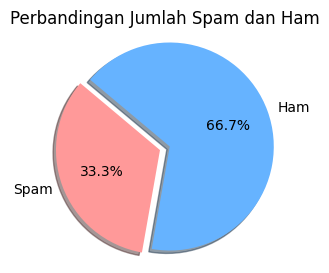

In [ ]:
import matplotlib.pyplot as plt

# Misalnya, data jumlah spam dan ham sudah ada
jumlah_spam = 500   # Ganti dengan jumlah data spam yang sebenarnya
jumlah_ham = 1000   # Ganti dengan jumlah data ham yang sebenarnya

# Data untuk pie chart
labels = ['Spam', 'Ham']
sizes = [jumlah_spam, jumlah_ham]
colors = ['#ff9999','#66b3ff']  # Warna yang lebih estetis
explode = (0.1, 0)  # Mengambil sedikit dari 'Spam' untuk efek pemisahan

# Membuat pie chart
plt.figure(figsize=(3,3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Menjaga chart tetap bulat
plt.title('Perbandingan Jumlah Spam dan Ham')
plt.show()

Kesimpulan :
- (SPAM)
Fitur-fitur yang terdapat pada spam biasanya berisi promosi seperti "claim", "reply", "prize", "free". Kata "www" sering kali menunjukkan adanya tautan di pesan, yang merupakan ciri khas dari pesan spam yang mengarahkan penerima ke situs web tertentu. Kata "txt", "mobile", dan "stop" menunjukkan bahwa pesan spam memberikan instruksi untuk berhenti atau membalas pesan.
- (NON SPAM)
Kata 'time', 'got', 'home', 'good', 'just', 'gt', 'lt', 'come', 'll', 'ok' ini mencerminkan percakapan sehari-hari yang lebih informal, sering kali berisi interaksi biasa di antara teman atau keluarga seperti interaksi pribadi, janjian pertemuan.